# Homework 3: Fitting and modeling

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# 1. Poisson, no limits

Suppose that $X_1, X_2, \ldots$ are independent draws from the Poisson(1) distribution.
Let $p_n$ be the probability that the sum of $n$ of these is more than $n + \sqrt{n}/2$:
$$p_n = \mathbb{P}\{ X_1 + \cdot + X_n > n + \sqrt{n}/2 \}.$$
In class we learned that for large $n$, that $p_n$ would be close to some value
(and, closer the larger $n$ is).
What is that value?
Justify your answer and check by simulation.

The sum of n independent Poisson(1) variables is: 
$S_n = X_n + ... + X_n ~$ Poisson(n)

But for large n, the CLT changes the probability :
$p_n = P(S_n > n + \Large\frac{\sqrt{n}}{2}) = P(\Large\frac{S_n - n}{\sqrt{n}} > \frac{1}{2}) \approx P(Z > 0.5) ,   Z ~ N(0, 1)$

Then we use the Normal CDF:
$P(Z > 0.5) = 1 - \Phi(0.5) \approx 1 - 0.6915 = 0.3085$

So as $ n \rightarrow \infty, p_n \rightarrow  0.3085$

In [15]:
# Parameters
n = 1000
num_trials = 100000
threshold = n + np.sqrt(n) / 2  # this is the upper bound in the probability

# Simulate 100000 trials of Poisson(1) values, each trial of length n=1000
samples = rng.poisson(1, size=(num_trials, n))

# Compute the sum of each trial (row)
sums = samples.sum(axis=1)

# Count how many sums exceed the threshold
count_exceed = np.sum(sums > threshold)

# Estimate probability
pn_estimate = count_exceed / num_trials

print(f"Estimated p_n for n = {n}: {pn_estimate:}")


Estimated p_n for n = 1000: 0.3082


# 2. Fly-by flies

At harvest time, orchards can have a lot of fruit flies.
Suppose that I sit down to eat lunch in an orchard
while flies go zipping by at an average rate of 5 per second.
Most of them manage to avoid my sandwich, but a small proportion hit the sandwich
(and get stuck): about 0.5%.
(Below when I ask you to "justify",
you can refer to material from class for the justification,
I don't mean you need to provide a mathematical proof.)

*(a)* About how often does a fly hit my sandwich?
Propose, and justify a distribution for $T$,
the amount of time that passes between subsequent flies
who hit my sandwich.
(Assume I don't do anything to avoid the flies or change the proportion who hit it.)

*(b)* Suppose it takes me 5 minutes to eat the sandwich.
How many flies have hit the sandwich during that time
(again assuming the proportion who hit it does not change as I eat).
Propose, and justify, a distribution for this number (let's call it $X$).
What's the probability that $X=0$?

*(c)* My friend prefers to eat their sandwich with a few flies in it.
How long will it be before their sandwich has been hit by at least five flies?
(Assume their sandwich is otherwise just like mine.)
Using simulation,
find the mean and describe the
distribution using a histogram or other summary.
*(hint: use your answer to (a) to simulate)*

###a.
Our scenario has indpependent rare events(flies hitting sandwich), and our model needs to measure the amount of time between these rare events, so we use the Exponential Distribution. Our value for $\lambda$ is calculated by finding the rate of which flies actually hit the sandwich, so:

 $\lambda = 5 \times 0.005 = 0.025$

For a distribution of T, a the time between flies is,

$T \approx$ Exponential $(0.025)$ 

The expected time is:

$\mathbf{E}(T) = \frac{1}{0.025} = 40$ seconds

###b
The effective rate of fly hits is:

$\lambda = 5$ flies/sec *  $0.005 = 0.025$ hits/sec

Over 300 sec:

expected # of hits is $\mu = \lambda * t = 0.025 * 300 = 7.5$ flies in 5 minutes(300 seconds)

So $X \approx Poisson(7.5)$

For the probability that X = 0:

Using the Probability Mass Function:
$\mathbb{P}(X = 0) = \Large\frac{7.5^0 * e^{-7.5}}{0!} = e^{-7.5} \approx 0.0006$

The simulation is below. 

###c
Here, we use the Gamma distrubution model since we are simulating the sum of 5 independent Exponential(0.025) values with these parameters: 

Time between hits is:

$T_i \approx Exponential(\lambda = 0.025)$


Total time to 5 hits is:

$T_total = T_1 + T_2 + T_3 + T_4 + T_5 \approx Gamma(5, \lambda)$

Mean:

$\mathbb{E}_{total} = 5 * \frac{1}{0.025} = 200$ seconds

The expected mean time is around 200 seconds, and the shape of the dist. is skewed right, but increasingly symmetric as number of hits increases.

The simulation is below. 

Question 2b
P(X = 0) ≈ 0.0006
Question 2c
Estimated mean time for 5 hits: 200.31 seconds


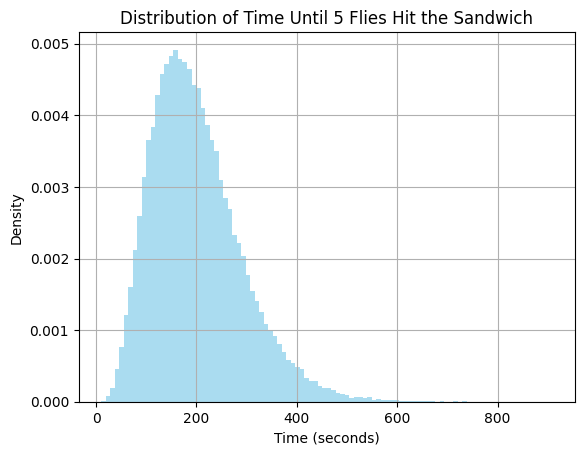

In [36]:

print("Question 2b")
print(f"P(X = 0) ≈ {np.exp(-7.5):.4f}")

print("Question 2c")
# Set parameters
num_trials = 100000
rate = 0.025  # λ
num_hits = 5

# Simulate: for each trial, sum of 5 exponential waiting times
wait_times = rng.exponential(scale=1/rate, size=(num_trials, num_hits))
total_times = wait_times.sum(axis=1)

# Compute mean time
mean_time = np.mean(total_times)
print(f"Estimated mean time for 5 hits: {mean_time:.2f} seconds")

# Plot histogram
plt.hist(total_times, bins=100, density=True, alpha=0.7, color='skyblue')
plt.title("Distribution of Time Until 5 Flies Hit the Sandwich")
plt.xlabel("Time (seconds)")
plt.ylabel("Density")
plt.grid(True)
plt.show()



###a
Let $X_1 , X_2,..., X_100$ be the yearly growths
That means our total growth can be shown as:

$S_{100} = \Large\Sigma^{100}_{i=1} X_i$

The variables are independent, so the sum has:

$\mathbb{E}[S_{100}] = 100 * 2 = 200$ cm

SD $[S_{100}] = \sqrt{100 * 2^2} = \sqrt{400} = 20$ cm

By the Central Limit Theorem(CLT), for large n, the sum is approx Normal:

$S_{100} \approx N(200, 20^{20}) \approx N(200 cm, 400cm^2) $

We can do the same calc for 10,000

$\mathbb{E}[S_{10000}] = 10000 * 2 = 20000$ cm = 200m

SD $[S_{10000}] = \sqrt{10000 * 2^2} = \sqrt{40000} = 20$ cm = 2m


$S_{100} \approx N(200m, 2^2) \approx N(200m, m^2)$

###b
For 100 Years: ($S_{100} > 220$ cm)

Standardize using the Z - score formula:

$Z = \frac{X - \mu}{\sigma}$. 

Plug in values $X = 220, \mu = 200, \sigma = 20$.

$Z = 1$ , so $\mathbb{P}(Z > 1) \approx 0.1587$

This means 15.87% of mountains will grow more than 220cm in 100 years.

For 10000 years ($S_{10000} > 220$ m): Same Steps:

Plug in values $X = 220, \mu = 200, \sigma = 2$ 

Z = 10 , so $\mathbb{P}(Z > 10) \approx 0.000000000001$

This means about 0%(approx) of mountains will grow more than 220m in 10,000 years.

###c
Expected Value:

$\mathbb{E}[S] = \Large\Sigma^{100}_{y = 1} \mathbb{E}[X_y] = \Large\Sigma \frac{y}{40} = \frac{1}{40} \Large\Sigma^{100}_{y = 1} y = \frac{1}{40} * \frac{100 * 101}{2} = \frac{5050}{40} = 126.25$ cm

Variance/Standard Deviation

$Var(S) = \Large\Sigma^{100}_{y=1}(\frac{y}{50})^2 = \frac{1}{2500} \Large\Sigma^{100}_{y=1} y^2 = \frac{100 * 101 * 201}{6} = 338350$

Then:
$Var(S) = \frac{338350}{2500} = 135.35 \rightarrow SD(S) = \sqrt{135.34} \approx 11.64$ cm

This means:

* Mean growth after 100 years = 126.25cm
* Standard Deviation after 100 years = 11.64cm

# 3. Orogeny

Converging tectonic plates are pushing a mountain range upwards.
Suppose that each year, a given mountain peak grows by a random amount whose average is 2cm and whose SD is 2cm.

*(a)* If the amount grown each year is independent of every other year,
what's the distribution, approximately, of the amount grown over 100 years (relative to the starting height)?
What about over 10,000 years?

*(b)* Suppose many mountains in this mountain range grow like this (independently).
What proportion of them grow more than 220cm over 100 years?
And, what proportion grow more than 220m over 10,000 years?

*(c)* In fact, the orogeny is accellerating.
Suppose that in fact over the next 100 years, the mean amount grown is in year $y$ is $y/40$ cm, with a SD of $y/50$ cm.
What is the mean height change after those 100 years? Explain your answer.
Also compute the standard deviation assuming that the amount grown each year is independent.

In [37]:
np.sum(np.arange(101)) / 40, np.sum(np.arange(101)**2) / 50**2


(np.float64(126.25), np.float64(135.34))

In [38]:
np.sqrt(np.sum(np.arange(101)**2) / 50**2)

np.float64(11.633572108342305)